# Testing Classical ML models 

In [2]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.svm import SVC
from sklearn.svm import NuSVC

from sklearn import metrics
from sklearn.metrics import roc_auc_score

## Defining the classifiers

In [3]:
names = [
    "Linear SVM",
    "RBF SVM",
    "Poly SVM",
    "Sigmoid SVM",
    "NuSVC"
]

classifiers = [
    SVC(kernel='linear'),
    SVC(kernel='rbf'),
    SVC(kernel='poly'),
    SVC(kernel='sigmoid'),
    NuSVC()
]

## Loading the Dataset

In [4]:
bank_data = pd.read_csv('bank_cleaned.csv')
bank_data = bank_data.sample(frac=1,random_state=98)

bank_data = bank_data.drop(columns='Unnamed: 0')

## Dataset

In [5]:
print(f'Shape of the Dataset: {bank_data.shape}\n')

bank_data.head()

Shape of the Dataset: (79844, 17)



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
36025,9.000000,1.000000,2.0,0.000000,0.0,984.000000,1.000000,1.0,0.000000,10.000000,8.000000,50.000000,4.000000,0.0,0.0,0.0,0
29522,30.000000,9.000000,2.0,1.000000,0.0,824.000000,1.000000,0.0,0.000000,2.000000,3.000000,1317.000000,0.000000,0.0,0.0,0.0,1
17534,41.000000,4.000000,1.0,1.000000,0.0,74.000000,0.000000,0.0,1.000000,28.000000,5.000000,175.000000,1.000000,0.0,0.0,0.0,0
60001,27.239532,4.114620,2.0,1.588538,0.0,1304.650994,0.411462,0.0,0.588538,18.770761,5.645848,972.994853,1.000000,0.0,0.0,0.0,1
72413,25.443061,3.863583,1.0,1.357948,0.0,2242.420522,0.000000,0.0,0.000000,28.284104,0.000000,388.926156,0.357948,0.0,0.0,0.0,1


## Selecting Features

In [6]:
Y = bank_data['y'].values
# X = bank_data[['age','job','marital','education','default','balance',
#                'housing','loan','contact','day','month','duration',
#                'campaign','pdays','previous','poutcome']].values
X = bank_data[['age', 'job', 'marital', 'education', 'default', 'balance',
               'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous', 'poutcome']].values

## Splitting into test and training data 


Total balanced data points :  79844
Features dimension :  15
Total data points after including synthetic data :  79844
The data is binary classified as 0 and 1
Number of 0's in the dataset: 11977
Number of 1's in the dataset: 11976
Training data, Testing Data : 23953 which is 30.0% percent of all the data points, 55891
Ratio between 0's and 1's : 1.0000835003340014



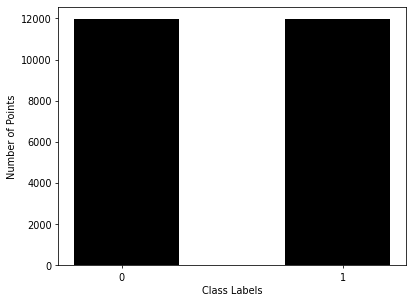

In [7]:
# Scaling Data
# ss = StandardScaler()
# X = ss.fit_transform(X)

train_size = 0.3

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=train_size, random_state=12,stratify=Y)

# Printing Dataset Details
print("\nTotal balanced data points : ", len(X))
print("Features dimension : ", np.shape(X)[1]) # including ID and label
print(f"Total data points after including synthetic data : ",len(X_train)+len(X_test))
print("The data is binary classified as 0 and 1")
print(f"Number of 0's in the dataset: {len(Y_train[Y_train==0])}")
print(f"Number of 1's in the dataset: {len(Y_train[Y_train==1])}")
print(f"Training data, Testing Data : {len(X_train)} which is {(train_size*100).__round__(3)}% percent of all the data points, {len(X_test)}")
print(f"Ratio between 0's and 1's : {len(Y_train[Y_train==0])/ len(Y_train[Y_train==1])}\n")

# Plotting no. of Class 0 vs 1 
fig = plt.figure(dpi=70)
plt.hist(Y_train, 3, facecolor='k')
plt.xticks([0.15,0.85], [0,1])
plt.xlabel('Class Labels')
plt.ylabel('Number of Points')
plt.show()

In [8]:
# iterate over classifiers
# for name, clf in zip(names, classifiers):

#     clf = make_pipeline(StandardScaler(), clf)
#     clf.fit(X_train, Y_train)
#     predictions = clf.predict(X_test)
#     test_metrics = metrics.classification_report(y_true=Y_test, y_pred=predictions, zero_division=0)
#     rocauc = round(roc_auc_score(y_test, predictions), 4)

#     print(f'Testing Metrics for {name}\n{test_metrics}')
#     print(f'ROC AUC Score: {rocauc}\n\n')

In [15]:
def classification(name,clf):
    
    print(f'Classifying using {name}.\n')
    
    start = time.time()
    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(X_train, Y_train)
    predictions = clf.predict(X_test)
    
    end = time.time()
    
    print(f'Time Taken to Classify using {name}: {(end-start)/60} mins\n')
    
    test_metrics = metrics.classification_report(y_true=Y_test, y_pred=predictions, zero_division=0)
    rocauc = round(roc_auc_score(Y_test, predictions), 4)

    print(f'Testing Metrics for {name}\n{test_metrics}')
    print(f'ROC AUC Score: {rocauc}\n\n')
    
    confusionMatrix = metrics.confusion_matrix(y_true=Y_test, y_pred=predictions)
    disp = metrics.ConfusionMatrixDisplay(confusionMatrix)
    disp.plot()
    plt.title(f"Confusion Matrix")
    plt.show()
    
    return None

Classifying using Linear SVM.

Time Taken to Classify using Linear SVM: 0.5192248384157817 mins

Testing Metrics for Linear SVM
              precision    recall  f1-score   support

           0       0.65      0.61      0.63     27945
           1       0.63      0.67      0.65     27946

    accuracy                           0.64     55891
   macro avg       0.64      0.64      0.64     55891
weighted avg       0.64      0.64      0.64     55891

ROC AUC Score: 0.6405




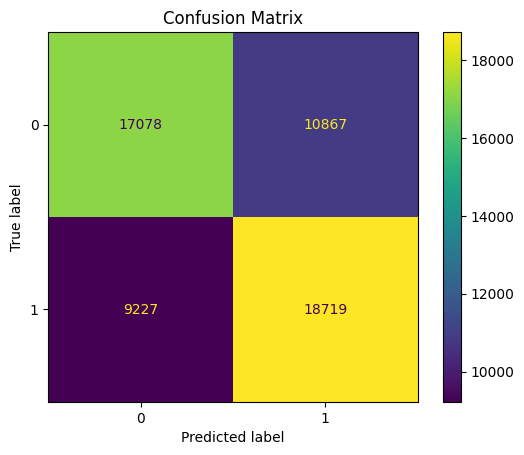

In [24]:
i = 0

classification(names[i],classifiers[i])

Classifying using RBF SVM.

Time Taken to Classify using RBF SVM: 0.6838243126869201 mins

Testing Metrics for RBF SVM
              precision    recall  f1-score   support

           0       0.76      0.89      0.82     27945
           1       0.87      0.72      0.79     27946

    accuracy                           0.81     55891
   macro avg       0.82      0.81      0.81     55891
weighted avg       0.82      0.81      0.81     55891

ROC AUC Score: 0.8082




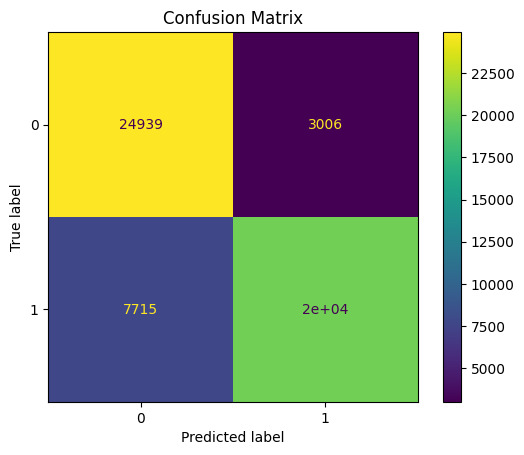

In [16]:
i = 1

classification(names[i],classifiers[i])

Classifying using Poly SVM.

Time Taken to Classify using Poly SVM: 0.37005460262298584 mins

Testing Metrics for Poly SVM
              precision    recall  f1-score   support

           0       0.76      0.78      0.77     27945
           1       0.77      0.76      0.77     27946

    accuracy                           0.77     55891
   macro avg       0.77      0.77      0.77     55891
weighted avg       0.77      0.77      0.77     55891

ROC AUC Score: 0.7684




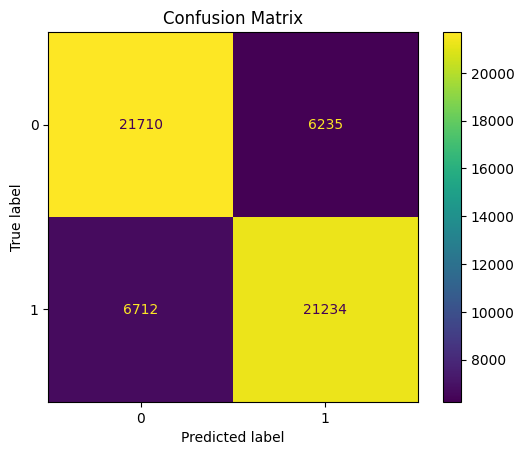

In [21]:
i = 2

classification(names[i],classifiers[i])

Classifying using Sigmoid SVM.

Time Taken to Classify using Sigmoid SVM: 0.4796857794125875 mins

Testing Metrics for Sigmoid SVM
              precision    recall  f1-score   support

           0       0.55      0.56      0.55     27945
           1       0.55      0.55      0.55     27946

    accuracy                           0.55     55891
   macro avg       0.55      0.55      0.55     55891
weighted avg       0.55      0.55      0.55     55891

ROC AUC Score: 0.5535




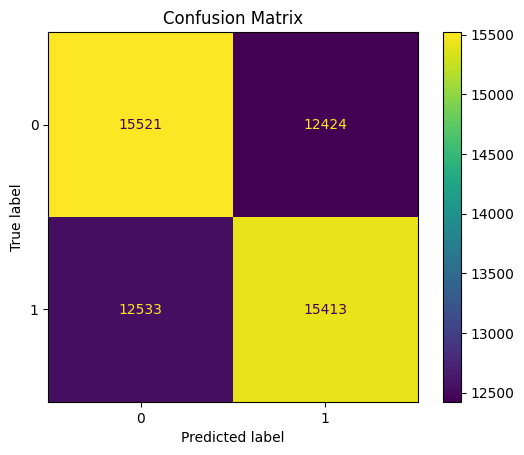

In [22]:
i = 3

classification(names[i],classifiers[i])

Classifying using NuSVC.

Time Taken to Classify using NuSVC: 0.7632097363471985 mins

Testing Metrics for NuSVC
              precision    recall  f1-score   support

           0       0.76      0.89      0.82     27945
           1       0.87      0.72      0.79     27946

    accuracy                           0.81     55891
   macro avg       0.81      0.81      0.80     55891
weighted avg       0.81      0.81      0.80     55891

ROC AUC Score: 0.8059




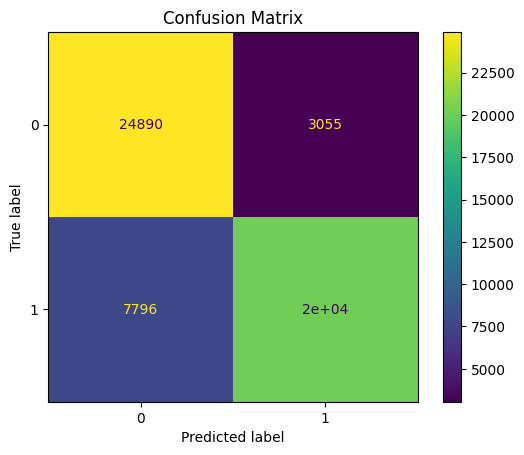

In [23]:
i = 4

classification(names[i],classifiers[i])